### Grading
The final score that you will receive for your programming assignment is generated in relation to the total points set in your programming assignment item—not the total point value in the nbgrader notebook.<br>
When calculating the final score shown to learners, the programming assignment takes the percentage of earned points vs. the total points provided by nbgrader and returns a score matching the equivalent percentage of the point value for the programming assignment. <br>
**DO NOT CHANGE VARIABLE OR METHOD SIGNATURES** The autograder will not work properly if your change the variable or method signatures. 

### WARNING
Please refrain from using **print statements/anything that dumps large outputs(>1000 lines) to STDOUT** to avoid running to into **memory issues**. 
Doing so requires your entire lab to be reset which may also result in loss of progress and you will be required to reach out to Coursera for assistance with this.
This process usually takes time causing delays to your submission.

### Validate Button
Please note that this assignment uses nbgrader to facilitate grading. You will see a **validate button** at the top of your Jupyter notebook. If you hit this button, it will run tests cases for the lab that aren't hidden. It is good to use the validate button before submitting the lab. Do know that the labs in the course contain hidden test cases. The validate button will not let you know whether these test cases pass. After submitting your lab, you can see more information about these hidden test cases in the Grader Output. <br>
***Cells with longer execution times will cause the validate button to time out and freeze. Please know that if you run into Validate time-outs, it will not affect the final submission grading.*** <br>

# EDA, Simple Linear Regression

In this assignment, we will use a simplified data and create a simple linear regression model. The dataset can be downloaded from https://www.kaggle.com/harlfoxem/housesalesprediction/download.    
This dataset contains house sale prices for Kings County, which includes Seattle. It includes homes sold between May 2014 and May 2015. There are several versions of the data. Some additional information about the columns is available here: https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/, some of which are copied below.

|Variable |	Description|
|:---------|:-------------|
|id 	|Identification|
|date |	Date sold|
|price |	Sale price|
|bedrooms |	Number of bedrooms|
|bathrooms |	Number of bathrooms|
|sqft_liv |	Size of living area in square feet|
|sqft_lot| 	Size of the lot in square feet|
|floors |	Number of floors|
|waterfront |	‘1’ if the property has a waterfront, ‘0’ if not.|
|view |	An index from 0 to 4 of how good the view of the property was|
|condition |	Condition of the house, ranked from 1 to 5|
|grade |	Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value.|
|sqft_above |	Square feet above ground|
|sqft_basmt |	Square feet below ground|
|yr_built 	|Year built|
|yr_renov |	Year renovated. ‘0’ if never renovated|
|zipcode |	5 digit zip code|
|lat 	|Latitude|
|long 	|Longitude|
|squft_liv15 |	Average size of interior housing living space for the closest 15 houses, in square feet|
|squft_lot15 |	Average size of land lost for the closest 15 houses, in square feet|

In [1]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

## 1. Munging data [15 pts]
In this part, let's load and inspect data. We will also learn how to transform columns when needed.

> 💡***Tip:***   `pd.read_csv(<file path>)` reads a csv file and returns to pandas data frame object. It can also read files with other delimiter such as `.tsv` files. pandas also has `pd.read_excel` to read excel files.
[See more in the document](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

In [2]:
df = pd.read_csv('data/house_data_washington.csv')

### 1a) Date string to numbers [5 pts]
Now, let's overview the dataframe. Using `.head()` on the dataframe, we can see the first 5 rows of the data. You can specify number of rows as argument then it will show those number of rows. similarly, `.tail()` gives the last 5 rows by default. You can see the columns names, but not all columns are displayed if there are too many columns.  

> 💡***Tip:*** If you want to show all columns and rows, there are [pandas command](https://www.geeksforgeeks.org/show-all-columns-of-pandas-dataframe-in-jupyter-notebook/#) setting max rows and cols. Please do not submit your homework notebook with displaying large dataframe because it may crash from large memory consumption.  

The column 'date' is the date sold (with some black timestamp as well), and the data is string type (Note that sometimes data tables may have date/time columns as datetime object types. In this example data, it has a string type). We will extract year and month information from the string. 
In the data frame `df`, let's create new features 'sales_year' and 'sales_month' using 'date' column.

> 💡***Tip:***  You can use either bracket (e.g. `df['date']`) or dot (e.g. `df.date`) to get the column `'date'` in the data frame `df`. A single columns object from dataframe is a pandas series object type, and you can use `.apply()` method for a transformation. `.apply()` is generic and can be applied to not only to single column (pandas series) but also to multiple columns (pandas dataframe). Here, we will apply it to a single column object and use `lambda` function inside the .`apply()` as shown below. For more examples, see the [doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html).  

In this case, when we inspect the 'date' column, it is a string object, so we can slice the year and month from the string. Also, we'd like to convert the extracted year and month strings to ingeters.

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print(df.date)
print(type(df.date.iloc[0]))

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object
<class 'str'>


In [5]:
# extract year and month info from the string
# create new features 'sales_year' and 'sales_month' in df

df['sales_year'] = df.date.apply(lambda x: int(x[:4]))
df['sales_month'] = df.date.apply(lambda x: int(x[4:6]))

In [6]:
df.groupby('sales_month')

Now, let's count how many sales occurred in each month and each year. We can use `.groupby()` function to group by 'sales_month' and 'sales_year' as shown below. 

> 💡***Tip:*** `.groupby()` itself returns an object that doesn't get displayed, not a processed dataframe. It is often used with some other aggregation method, such as `.count()`, `.mean()`, `.sum()`, etc. In the below example use case, we use `.count()` to count number of sales per each group (e.g. by sales_month). `.groupby()` can also group by multiple columns. This [resource](https://realpython.com/pandas-groupby/) has more explanations and examples.

In [7]:
print(df.groupby('sales_month')['id'].count())
print(df.groupby('sales_year')['id'].count())

sales_month
1      978
2     1250
3     1875
4     2231
5     2414
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
Name: id, dtype: int64
sales_year
2014    14633
2015     6980
Name: id, dtype: int64


**Question 1a-1.** Based on the output from above cell, which month has the most number of sales?

In [8]:
# your code here

# uncomment below and update the value as an integer
most_sales_month = 5

In [9]:
# tests solutions for most_sales 

**Question 1a-2.** Which months has the least number of sales?

In [10]:
# your code here

# uncomment below and update the value as an integer
least_sales_month = 1

In [11]:
# tests solutions for least_sales

Now, let's have a look at what data type each columns has. We can use `.info()` method on the dataframe object to see the data type. You can see `int64`, `float64` and `object` in our example. `object` can be string type or something else (such as list or other types of objects). 
> 💡***Tip:*** Note that sometimes raw data is not adequately formatted that you might see columns that are supposed to be numbers can be typed as strings. It is a good practice to inspect data columns's data types and clean them if necessary.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### 1b) Variable types [5 pts]
Inspect each feature's data type and variable type. What is the best description for the variable type of following features? Update the string to 'numeric' or 'categorical'.

**Self-check Concepts**    
✔️ What data types can be considered as a numeric variable?    
✔️ What is the difference between ordinal and non-ordinal categorical variables?     

> 💡***Tip:*** Is binary categorical variable (Yes/No, Male/Female, True/False, Positive/Negative etc) numeric? Why or why not?      
How about a variable that has meaning of degree- such as survey/review ratings (very satisfied = 5, satisfied = 4, neutral = 3, disatisfied = 2, very disatisfied = 1)?         
Typically it is recommended to treat ordinal categorical variable (which order has meaning- e.g. degree, grades, numbers, severity etc) as numeric variable because a linear regression (or any ML) model can treat that variable (feature) as numbers and can learn a relationship to the target variable y. Also, categorical variables need to be binarized (which involves to transform the column into multiple binary columns) before used in a linear regression model. So if we treat an ordinal categorical variable to one numeric variable column instead of multiple binary columns representing categorical variable, it is more efficient for the model. Remember- a simpler model with the same information is better! 

In [58]:
# your code here

df.dtypes
# uncomment the feaures below and update the strings with 'numeric' or 'categorical'
price = 'numeric'
bathrooms = 'numeric'
waterfront = 'categorical'
grade = 'numeric'
zipcode = 'categorical'
sales_year = 'numeric'

In [14]:
# You can use below to check what unique values exist in each column.
for c in df.columns[2:]:
    print(c, df[c].unique())


price [ 221900  538000  180000 ...  610685 1007500  402101]
bedrooms [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
bathrooms [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
sqft_living [1180 2570  770 ... 3087 3118 1425]
sqft_lot [ 5650  7242 10000 ...  5813  2388  1076]
floors [1.  2.  1.5 3.  2.5 3.5]
waterfront [0 1]
view [0 3 4 2 1]
condition [3 5 4 1 2]
grade [ 7  6  8 11  9  5 10 12  4  3 13  1]
sqft_above [1180 2170  770 1050 1680 3890 1715 1060 1890 1860  860 1430 1370 1810
 1980 1600 1200 1250 2330 2270 1070 2450 1710 1750 1400  790 2570 2320
 1190 1510 1090 1280  930 2360  890 2620 2600 3595 1570  920 3160  990
 2290 2165 1640 1000 2130 2830 2250 2420 3250 1850 1590 1260 2519 1540
 1110 1770 2720 2240 3070 2380 2390  880 1040  910 3450 2350 1900 1010
  960 2660 1610  765 3520 1290 1960 1160 1210 1270 1440 2190 2920 1460
 1170 1240 3140 2030 2310  700 1080 2520 2780 1560 1450 1

In [15]:
# test 1/6 for 1b 
# This test is an example. The rest tests are hidden but are the same as this one checking each answer.
assert price == 'numeric', "Check 1b. What is the correct variable type for price?"

In [16]:
# test 2/6 for 1b 

In [17]:
# test 3/6 for 1b 

In [18]:
# test 4/6 for 1b 

In [19]:
# test 5/6 for 1b 

In [20]:
# test 6/6 for 1b 

### 1c) Drop features [5 pts]
Let's drop features that are unnecessary. `id` is not a meaningful feature. `date` string has been coded to `sales_month` and `sales_year`, so we can remove `date`. `zipcode` can be also removed as it's hard to include in a linear regression model and the location info is included in the `lat` and `long`.
Drop the features `id`, `date`, and `zipcode` and replace the df.

> 💡***Tip:*** .drop() function can drop one or more columns or rows. Learn how to use it in the [doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)


In [21]:
# drop unnecessary features, replace df
# your code here

df = df.drop(columns=['id', 'date', 'zipcode'])

In [22]:
# tests that you droppd the features id, date, and zipcode from df

## 2. More inspection; Correlation and pair plot [5 pts]
### 2a) Get correlation matrix on the data frame. [5 pts]
Which feature may be the best predictor of price based on the correlation? Answer as a string value (e.g. best_guess_predictor = 'price' or best_guess_predictor = 'yr_built')

> 💡***Tip:*** .corr() finction can show correlation matrix from the dataframe. [More resource](https://www.geeksforgeeks.org/python-pandas-dataframe-corr/#)


**Self-check Concepts**    
✔️ By looking at the correlation matrix, how do you decide which feature is the best predictor?

In [23]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,sales_year,sales_month
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447,0.003576,-0.010081
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244,-0.009838,-0.001533
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175,-0.026596,0.007392
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286,-0.029038,0.011810
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557,0.005468,-0.002369
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269,-0.022315,0.014005
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703,-0.004165,0.008132
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575,0.001364,-0.005638
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406,-0.045589,0.021978
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.114084,0.198372,0.713202,0.119248,-0.030387,0.008376


In [24]:
# your code here

# uncomment and update best_guess_predictor with a string value
best_guess_predictor = 'sqft_living'

In [25]:
# tests the solution for best_guess_predictor

### 2b) Display the correlation matrix as heat map [Not graded]
[`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) can visualize a matrix as a heatmap. Visualize the correlation matrix using seaborn.heatmap(). Play with color map, text font size, decimals, text orientation etc. For example, the resulting display may look like below. If you find how to make a pretty visualization, please share in the discussion board.
![correlation matrix](imgs/correlation_matrix.png)
<br>
**Note:** your code for this section may cause the Validate button to time out. If you want to run the Validate button prior to submitting, you could comment out the code in this section.

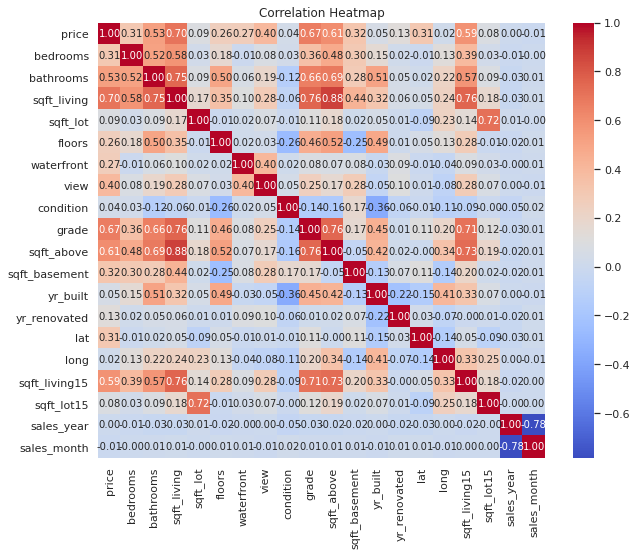

In [26]:
# practice visualizing correlation matrix using a heatmap
# your code here
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### 2c) Pair plot [Not graded]
Pair plot is a fast way to inspect relationships between features. Use seaborn's .pairplot() function to draw a pairplot if the first 10 columns (including price) and inspect their relationships. Set the diagonal elements to be KDE plot. The resulting plot will look like below.
![pair plot](./imgs/pair_plot.png)

**Note:** your code for this section may cause the Validate button to time out. If you want to run the Validate button prior to submitting, you could comment out the code in this section.

In [27]:
# practice inspecting relationships between features using a pair plot. 
# your code here


## 3. Simple linear regression [20 pts]

### 3a) Data preparation [5 pts]
We will split the data to train and test datasets such that the test dataset is 20% of original data.
Use `sklearn.model_selection.train_test_split` function to split the data frame to X_train and X_test. X_train is 80% of observation randomly chosen. X_test is the rest 20%. Both X_train and X_test are `pd.DataFrame` object and include 'price' in the table. Note that the train_test_split can handle data frame as well as array.

> 💡***Tip:*** Use sklearn.model_selecttion.train_test_split to split the data frame. We would like X_train to be 80% of the observation and X_test to be 20% of the observations. Print length of X_train and X_test.

In [39]:
from sklearn.model_selection import train_test_split

# your code here
print(df.isnull().sum())
y = df['price']
X = df.drop(columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)


price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sales_year       0
sales_month      0
dtype: int64


In [29]:
# Testing cell for self-check
assert(len(X_train) == 17290), "Check 3a, did you split properly so X_Train is 80% of the observations?"
assert(type(X_train)==type(pd.DataFrame())), "Check 3a, what type of object should X_train be?"

In [30]:
# Testing cell 

In [31]:
# Testing cell 


### 3b) Train a simple linear regression model [5 pts]
Use the best_guess_predictor as a single predictor and build a simple linear regression model using **`statsmodels.formula.api.ols`** function (https://www.statsmodels.org/dev/example_formulas.html)
Print out the result summary. Train on the X_train portion. What is the adjusted R-squared value?

> 💡***Tip:*** We had imported the library at the top of this notebook. So you can use the `smf` alias.
>```python
>import statsmodels.formula.api as smf
>```

N.B.: It recommended that you use the statsmodel library to do the regression analysis as opposed to e.g. sklearn. The sklearn library is great for advanced topics, but it's easier to get lost in a sea of details and it's not needed for these problems.

In [42]:
# use best_guess_predictor as a single predictor
# build a simple linear regression model, train on the X_train portion

# Make sure to use the `statsmodels.formula.api.ols` function for building the model. 
# model = 

#update following value according to the result
# adj_R2 =  

# your code here

train_data = pd.concat([X_train, y_train], axis=1)

predictor_variable = 'sqft_living'

formula = f'price ~ {predictor_variable}'

model = smf.ols(formula=formula, data=train_data).fit()
print(model.summary())

adj_R2 = model.rsquared_adj

print(adj_R2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                 1.640e+04
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:03:11   Log-Likelihood:            -2.4023e+05
No. Observations:               17290   AIC:                         4.805e+05
Df Residuals:                   17288   BIC:                         4.805e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.666e+04   4917.924     -7.455      

In [43]:
# self test
assert len(model.params.index) == 2, 'Check 3b, Number of model parameters (including intercept) does not match. Did you make a univariate model?'

In [44]:
# hidden test for 3b

In [45]:
# hidden test for 3b
                                                                          

### 3c) Best predictor [10 pts]
In question 5a, we picked a best guess predictor for price based on the correlation matrix. Now we will consider whether the best_guess_predictor that we used is still the best.<br>
Print out a list ranking all of the predictors. Then print out a list of the top three predictors in order.<br>      
**Hint:** Linear regression uses adjusted R squared as fit performance. So you can rank by this metric.<br>
- What were your top three predictors? 
- How did you order your list of predictors to select those as the top ones? 
- Is your top predictor for this section the same as the best guess predictor you selected in question 2a? 

In [50]:
# your code here

adjusted_r_sq = []

for predictor in df.columns[df.columns != 'price']:
    X = df[[predictor]]
    y = df['price']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    adjusted_r_sq.append((predictor, model.rsquared_adj))
    
    sorted_predictors = sorted(adjusted_r_sq, key=lambda x: x[1], reverse=True)
    
    for predictor, adj_r_sq in sorted_predictors:
        print(f"{predictor}: {adj_r_sq}")
        
        
    top_three_predictors = sorted_predictors[:3]
    print("\n top three predictors")
    for predictor, adj_r_squared in top_three_predictors:
        print(f"{predictor}: {adj_r_sq}")
        
top_three = [predictor for predictor, _ in top_three_predictors]
# uncomment and update top_three
# top_three = []

bedrooms: 0.09503760137124562

 top three predictors
bedrooms: 0.09503760137124562
bathrooms: 0.27573588658794956
bedrooms: 0.09503760137124562

 top three predictors
bathrooms: 0.09503760137124562
bedrooms: 0.09503760137124562
sqft_living: 0.49282974777855504
bathrooms: 0.27573588658794956
bedrooms: 0.09503760137124562

 top three predictors
sqft_living: 0.09503760137124562
bathrooms: 0.09503760137124562
bedrooms: 0.09503760137124562
sqft_living: 0.49282974777855504
bathrooms: 0.27573588658794956
bedrooms: 0.09503760137124562
sqft_lot: 0.007993168999240408

 top three predictors
sqft_living: 0.007993168999240408
bathrooms: 0.007993168999240408
bedrooms: 0.007993168999240408
sqft_living: 0.49282974777855504
bathrooms: 0.27573588658794956
bedrooms: 0.09503760137124562
floors: 0.06589987752816528
sqft_lot: 0.007993168999240408

 top three predictors
sqft_living: 0.007993168999240408
bathrooms: 0.007993168999240408
bedrooms: 0.007993168999240408
sqft_living: 0.49282974777855504
bathrooms:

In [51]:
# self test cell
assert(type(top_three) == list), "Check 3c, the top_three needs to be a list."
assert(len(top_three) == 3), "Check 3c, the top_three list needs to have three element."

In [52]:
# test cell

In [53]:
# test cell

In [54]:
# test cell

In [55]:
# test cell

In [56]:
# test cell

In [57]:
# test cell